In [26]:
import openai
import base64
import os
from IPython.display import Image

from config import OPENAI_API_KEY  # <-- Import from config.py

# Set your OpenAI API key securely
openai.api_key = OPENAI_API_KEY

def encode_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def analyze_image(image_path):
    base64_image = encode_image(image_path)

    response = openai.chat.completions.create(
        model="gpt-4-turbo-2024-04-09",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                        },
                    },
                    {
                        "type": "text",
                        "text": "Briefly describe what you see in this image.",
                    },
                ],
            }
        ],
        max_tokens=50,
    )

    message_text = response.choices[0].message.content.strip()
    token_usage = response.usage.total_tokens

    return token_usage, message_text


def compare_image_tokens(original_path, optimized_path):
    try:
        original_tokens, original_text = analyze_image(original_path)
        optimized_tokens, optimized_text = analyze_image(optimized_path)

        print("\n--- Original Image ---")
        print(f"🧠 Model Response: {original_text}")
        print(f"🧾 Tokens Used: {original_tokens}")
        display(Image(filename=original_path)) 

        print("\n--- Optimized Image ---")
        print(f"🧠 Model Response: {optimized_text}")
        print(f"🧾 Tokens Used: {optimized_tokens}")
        display(Image(filename=optimized_path))

        print("\n--- Comparison ---")
        print(f"📉 Tokens Saved: {original_tokens - optimized_tokens}")

    except Exception as e:
        print(f"❌ Error: {e}")


--- Original Image ---
🧠 Model Response: This image features a red Mercedes-Benz G-Class SUV parked outdoors. The vehicle is positioned front and center with a strong, robust stance, emphasizing its distinctive boxy shape and rugged design. The setting includes a backdrop of modern architecture and trees, giving a
🧾 Tokens Used: 1172


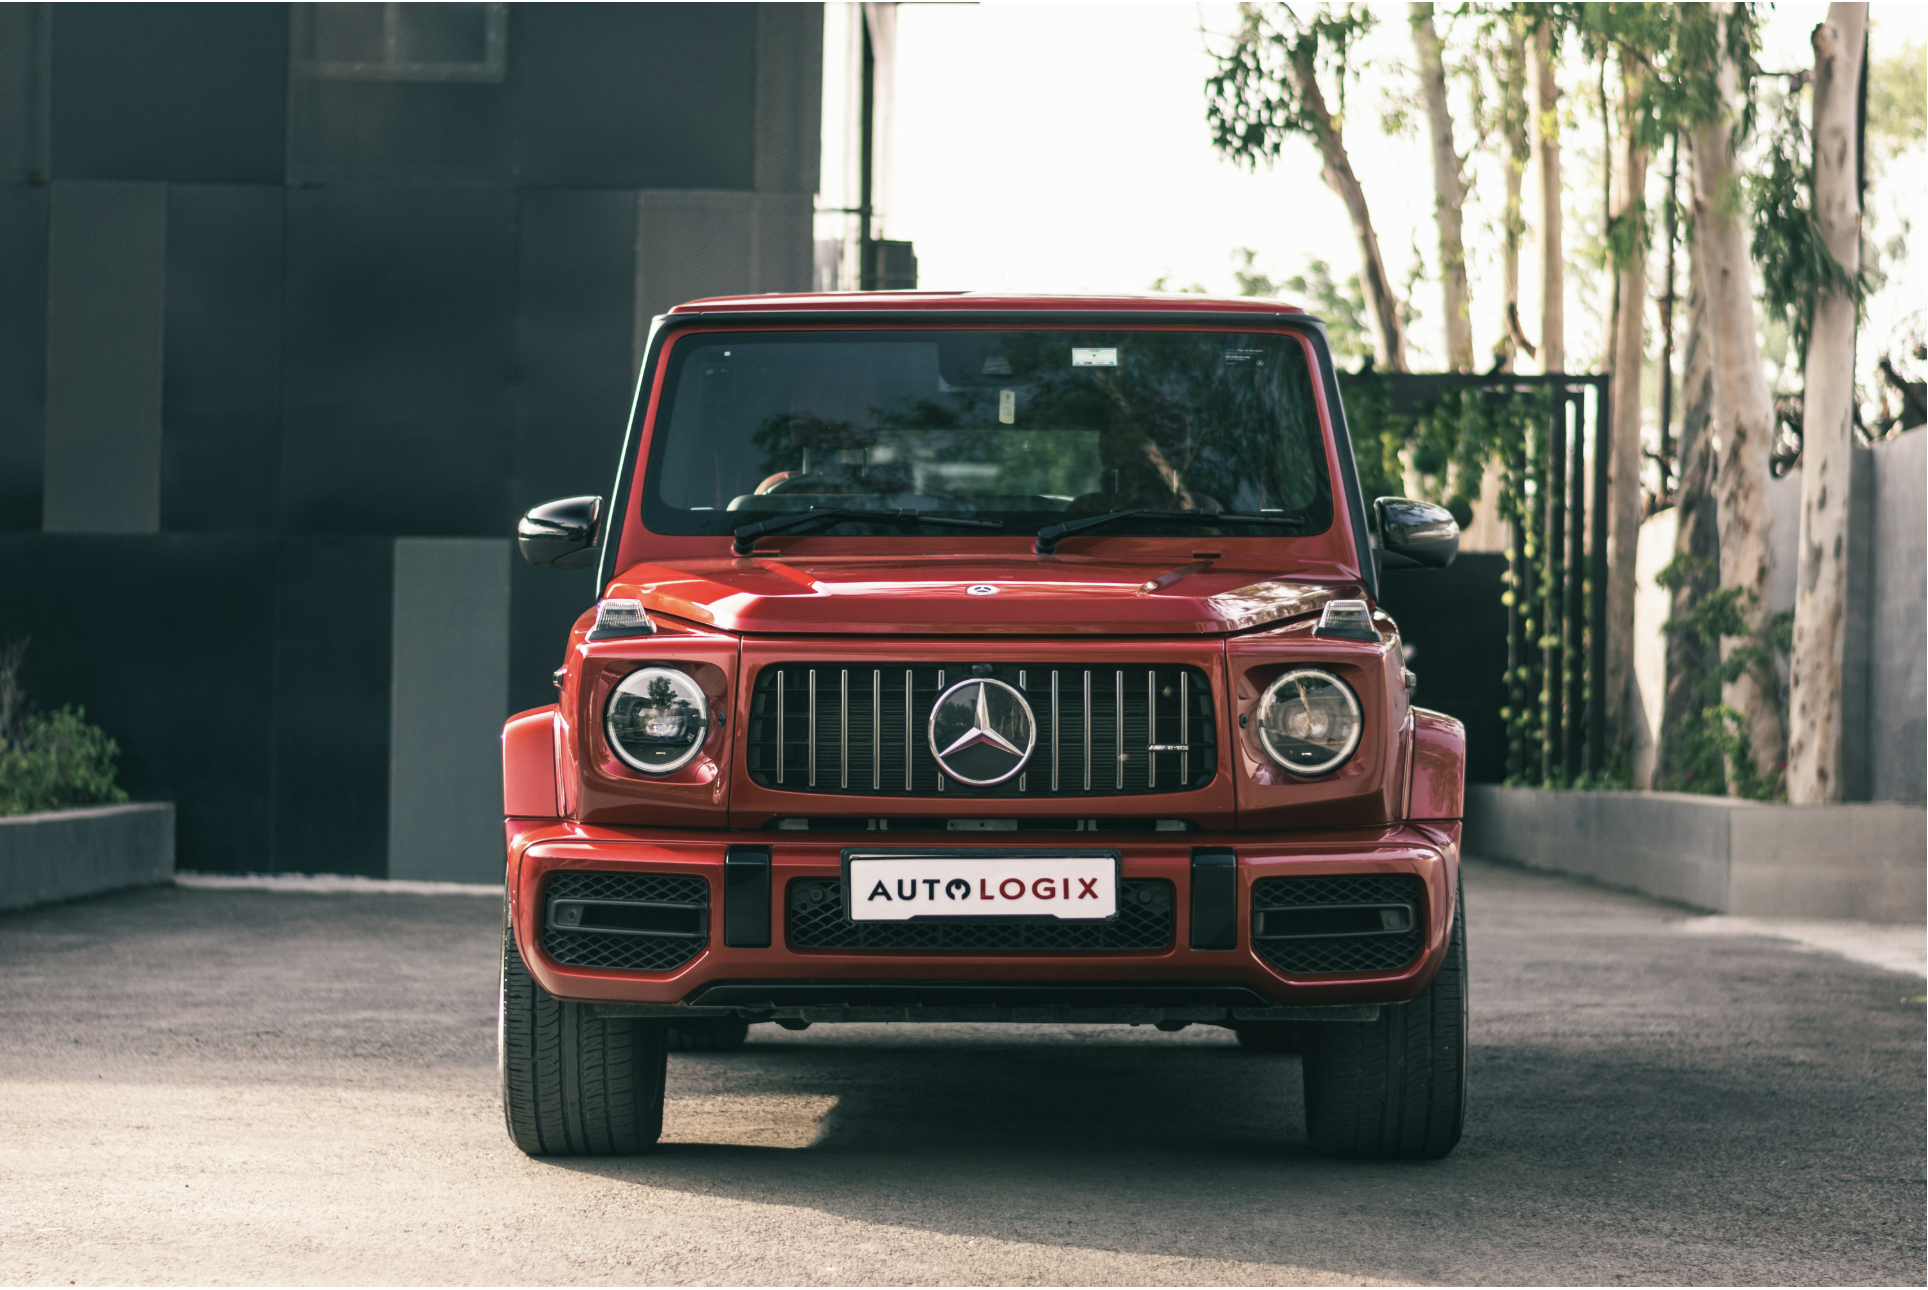


--- Optimized Image ---
🧠 Model Response: The image features a red Mercedes-Benz G-Class SUV parked in a driveway. The vehicle is centered in the frame, boasting the distinctive Mercedes-Benz emblem on the grille. The setting includes modern architectural elements, suggesting an urban environment. The license plate reads "
🧾 Tokens Used: 322


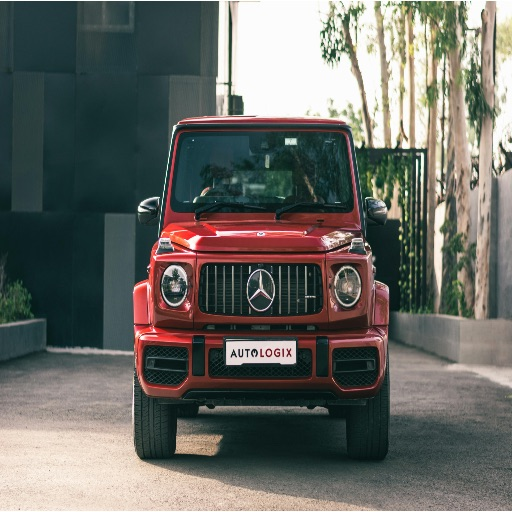


--- Comparison ---
📉 Tokens Saved: 850


In [21]:
compare_image_tokens("merc_original.png", "merc_resized.jpeg")


--- Original Image ---
🧠 Model Response: This image displays a French educational slide intended for practicing listening, reading, and speaking skills. It includes a brief story about a character named Lucie who has just come home from school and relaxes on the couch, her brother Quentin who is watching "
🧾 Tokens Used: 1172


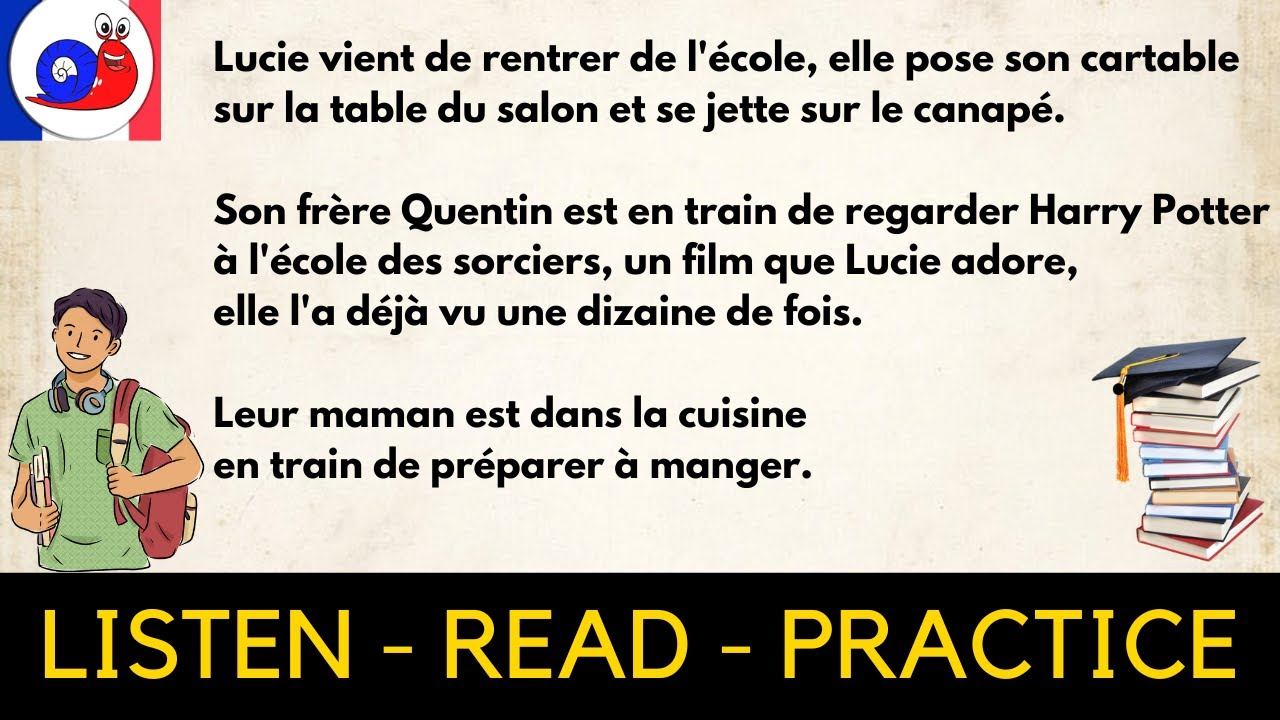


--- Optimized Image ---
🧠 Model Response: The image is a visual aid for learning French, containing text and illustrations. At the top left, there's a logo resembling the French flag beside which is the text "Lucie vient de rentrer de l'école, elle pose son cartable
🧾 Tokens Used: 322


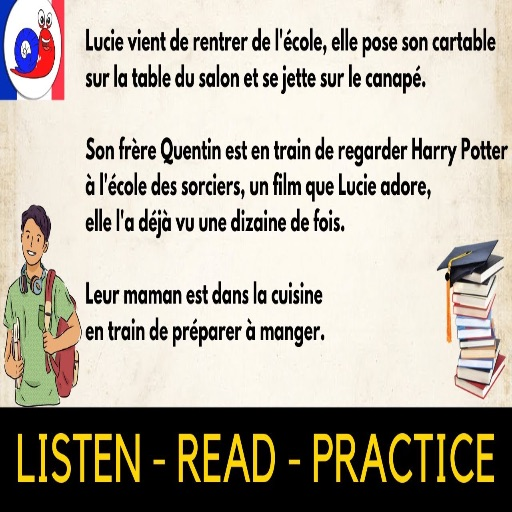


--- Comparison ---
📉 Tokens Saved: 850


In [22]:
compare_image_tokens("text.jpg", "text_resized.jpeg")


--- Original Image ---
🧠 Model Response: This image displays a terminal output showing a traceback of an error encountered while running a Python script. The script attempts to start a server using the Bottle web framework on localhost at port 3000. The error message at the bottom, "OSError:
🧾 Tokens Used: 1172


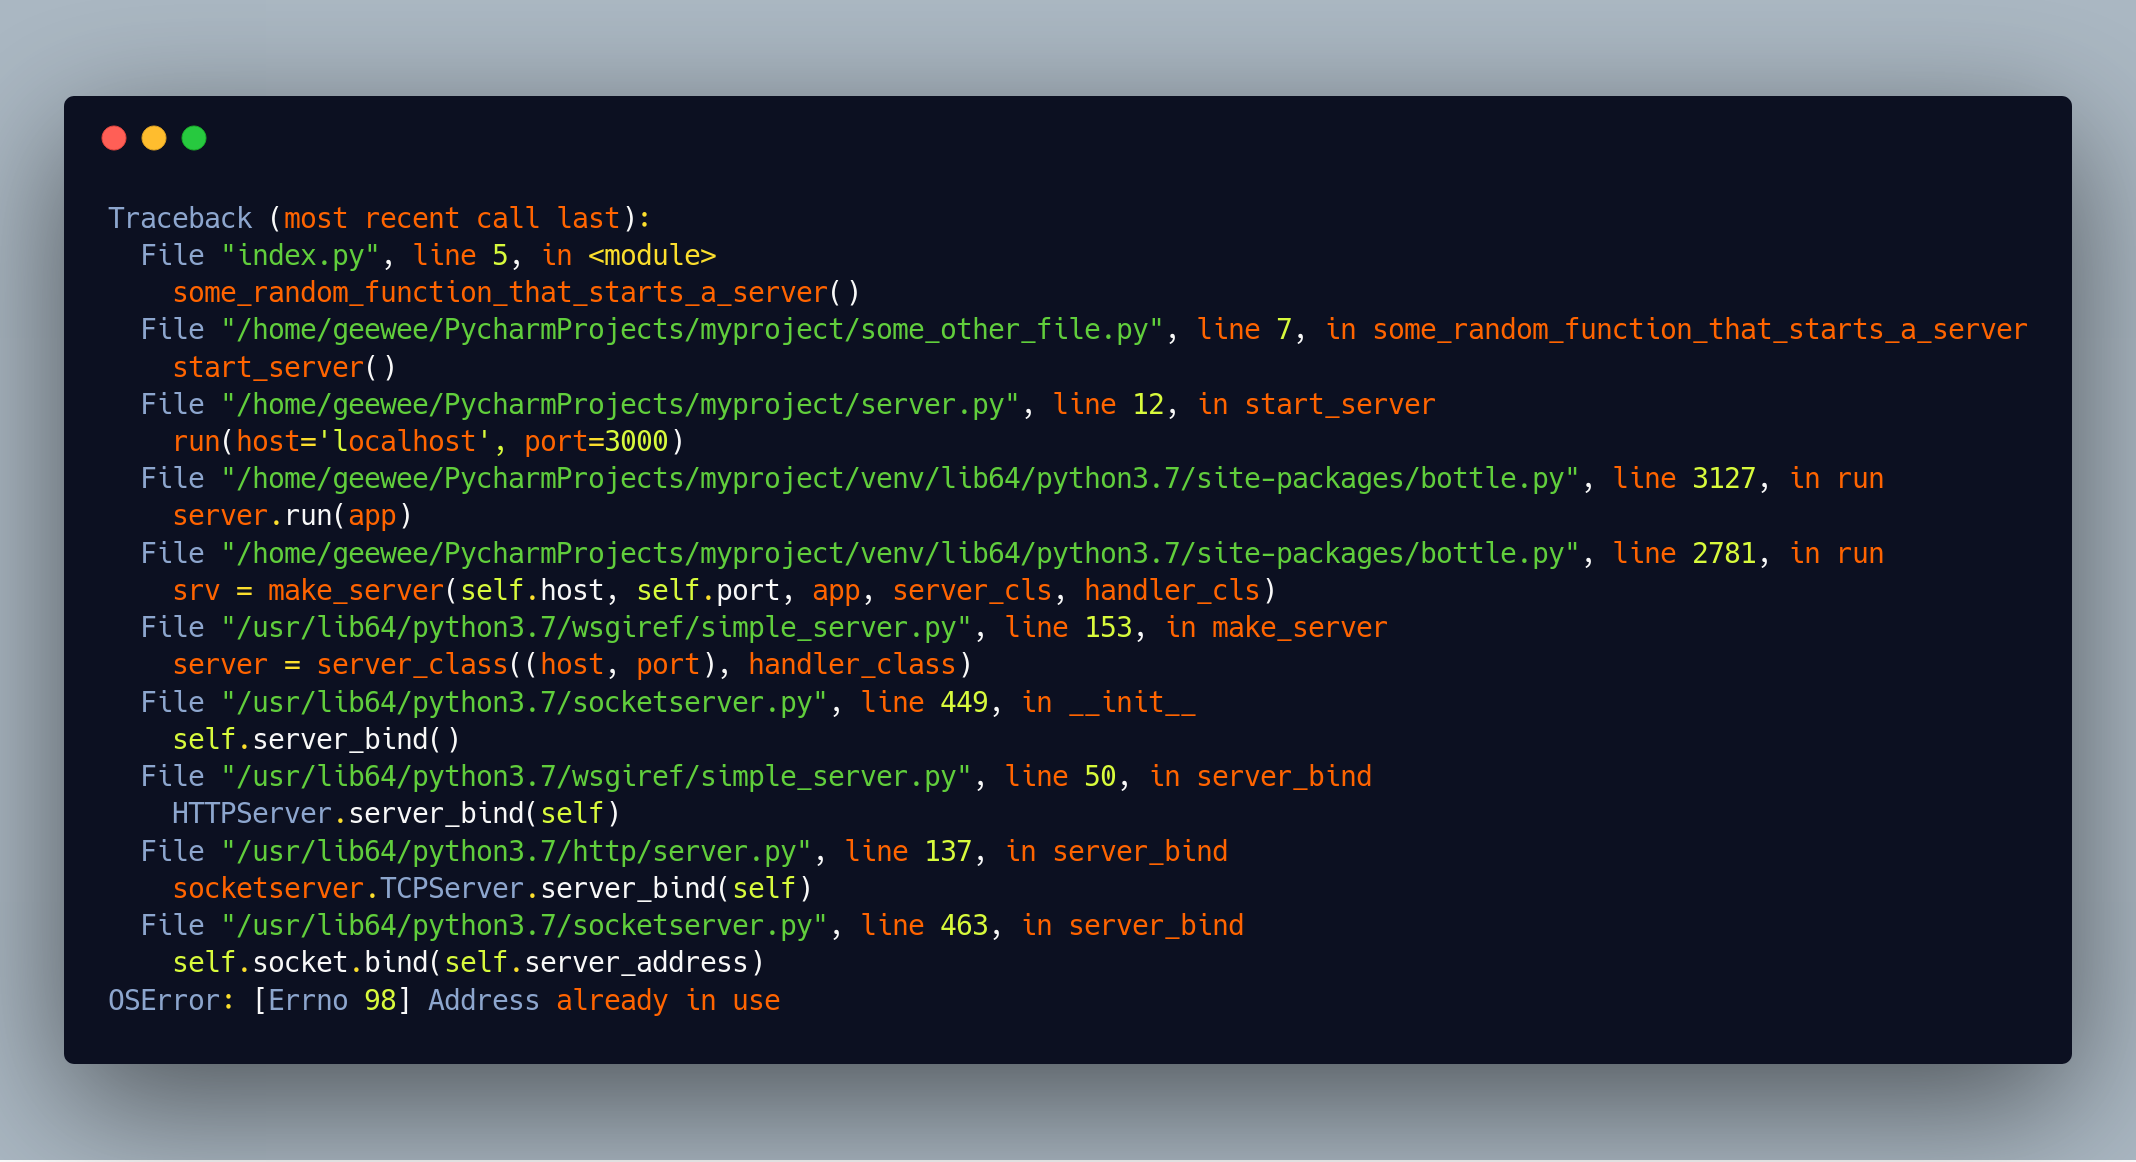


--- Optimized Image ---
🧠 Model Response: The image shows a screenshot of a terminal log displaying a traceback of an error encountered while running Python code. This is evident from the structure and syntax such as "File", "line", and the use of "self" commonly seen in Python scripts.
🧾 Tokens Used: 322


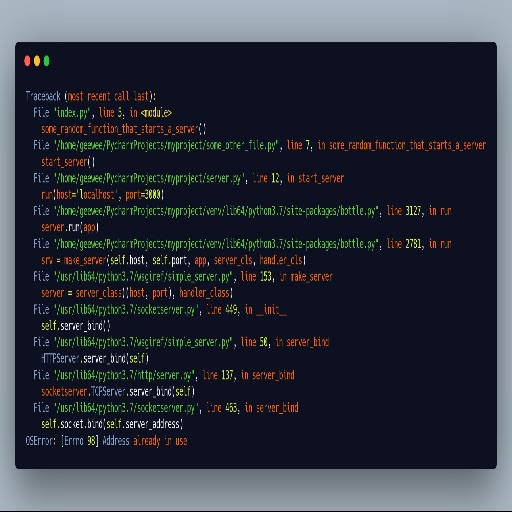


--- Comparison ---
📉 Tokens Saved: 850


In [23]:
compare_image_tokens("code_error.png", "code_error_resized.jpeg")


--- Original Image ---
🧠 Model Response: This image shows an X-ray of a human forearm with a clear break in one of the bones. Specifically, the radius (one of the two long bones in the forearm) appears to have a displaced fracture. The bone segments are not aligned, which
🧾 Tokens Used: 1172


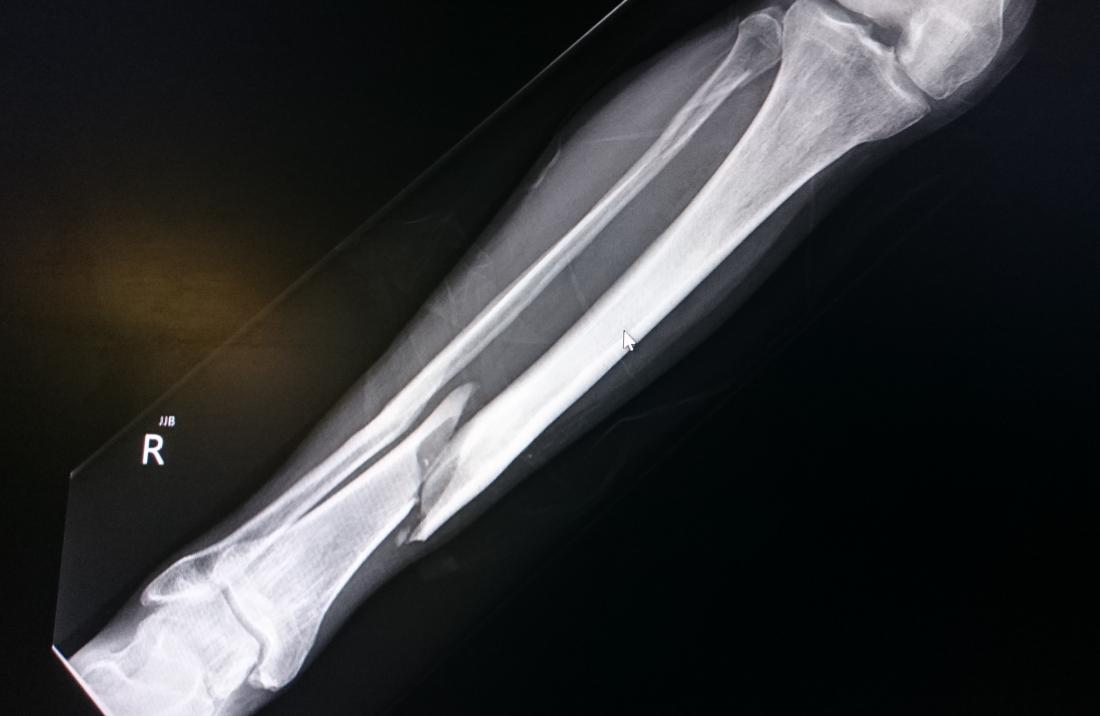


--- Optimized Image ---
🧠 Model Response: The image you provided is an X-ray of a human forearm showing Radius and Ulna bones. The X-ray indicates the presence of a metal implant within the Radius, suggesting that a surgical intervention, possibly for a fracture, has been conducted.
🧾 Tokens Used: 322


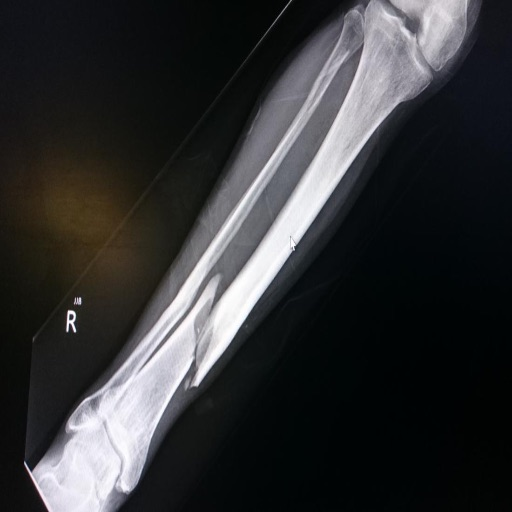


--- Comparison ---
📉 Tokens Saved: 850


In [25]:
compare_image_tokens("x-ray.jpg", "xray_resized.jpeg")